In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv('prices_verge.csv')

In [3]:
df.drop('Unnamed: 0',axis=1, inplace=True)

In [4]:
df_tweets = pd.read_json('datagathered.json',lines=True)

In [5]:
df_tweets.drop('_id',axis=1,inplace=True)

In [6]:
df_tweets.head()

,favorite,reply,retweet,text,time
0,22,8,4,#bitcoin TA analysis as you can see we complet...,1 Feb 2018
1,40,5,8,I believe the time is now to invest in crypto ...,1 Feb 2018
2,1,2,,Third Target of #ZEC (ZEC/BTC) reached.\n+20% ...,1 Feb 2018
3,6,2,,They said February would be different...\n#blo...,1 Feb 2018
4,21,5,8,"The market will he green, please guys do not p...",1 Feb 2018


In [103]:
df_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77921 entries, 0 to 77920
Data columns (total 5 columns):
favorite    77921 non-null object
reply       77921 non-null object
retweet     77921 non-null object
text        77921 non-null object
time        77921 non-null datetime64[ns]
dtypes: datetime64[ns](1), object(4)
memory usage: 3.0+ MB


In [7]:
import datetime as dt
df_tweets['time']=pd.to_datetime(df_tweets['time'])

In [8]:
df['Date']= pd.to_datetime(df['Date'])

In [9]:
df_tweets.sort_values(by='time',inplace=True)
df_tweets.reset_index(drop=True,inplace=True)

In [10]:
df.sort_values(by='Date',inplace=True)
df.reset_index(drop=True,inplace=True)

In [11]:
df_tweets.head()

,favorite,reply,retweet,text,time
0,,,,BTC-XVG $XVG https://bittrex.com/Market/Index?...,2017-02-02
1,1,,,Price Alert: Verge -50.00% 1h change $XVG - ...,2017-02-07
2,,,,Price Alert: Verge 50.00% 1h change $XVG - Cu...,2017-02-09
3,,,,"Cosa Ã¨ #Aikapool, come funziona e si configur...",2017-03-17
4,1,1,3,After posting about #bay and being its long te...,2017-03-25


In [12]:
df.head()

,Date,Open,High,Low,Close,Volume,Market Cap
0,2014-10-25,0.000007,0.000010,0.000007,0.000007,707,"24,519"
1,2014-10-26,0.000007,0.000013,0.000007,0.000011,"2,234","24,407"
2,2014-10-27,0.000011,0.000017,0.000007,0.000010,"2,857","40,807"
3,2014-10-28,0.000010,0.000011,0.000004,0.000004,"2,185","37,687"
4,2014-10-29,0.000004,0.000011,0.000004,0.000007,"1,221","15,542"


In [13]:
%matplotlib inline

In [14]:
df['Volume']=df['Volume'].apply(lambda x: float(x.replace(',','')))

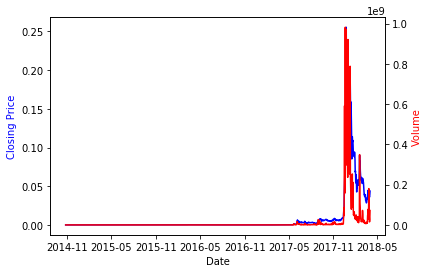

In [15]:
fig, ax1 = plt.subplots()
ax1.set_xlabel('Date')
ax1.set_ylabel('Closing Price',color='blue')
ax1.plot(df['Date'],df['Close'],color="blue")
ax2= ax1.twinx()
ax2.set_ylabel('Volume', color = "red")
ax2.plot(df['Date'],df['Volume'],color='red')
plt.show()

In [16]:
df_test1 = df[(df['Date']>dt.datetime(2017,5,1))&(df['Date']<dt.datetime(2018,3,22))]
df_test1.reset_index(drop=True,inplace=True)

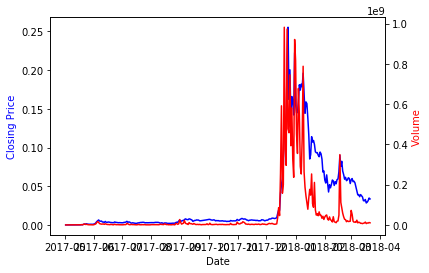

In [17]:
fig, ax1 = plt.subplots()
ax1.set_xlabel('Date')
ax1.set_ylabel('Closing Price',color='blue')
ax1.plot(df_test1['Date'],df_test1['Close'],color="blue")
ax2= ax1.twinx()
ax2.set_ylabel('Volume', color = "red")
ax2.plot(df_test1['Date'],df_test1['Volume'],color='red')
plt.show()

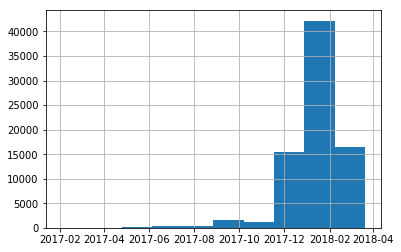

In [18]:
df_tweets['time'].hist()

In [19]:
df_tweets_test = df_tweets[(df_tweets['time']>dt.datetime(2017,5,1))&(df_tweets['time']<dt.datetime(2018,3,22))]

In [20]:
df_tweets_test.head()

,favorite,reply,retweet,text,time
11,2,,,One of the last chances to get #XVG #VergeCoin...,2017-05-05
12,,1,1,#XVG,2017-05-06
13,1,,,Just bought more #Xvg with very pretty cool pr...,2017-05-10
14,1,,1,It's time to #Xvg pump??? Good signals,2017-05-10
15,,,,BTC-XVG $XVG https://bittrex.com/Market/Index?...,2017-05-10


In [21]:
import string
def clean_tweets(text):
    text.replace('\n',' ')
    text = re.sub(r'^RT[\s]+', '', text, flags=re.MULTILINE)
    text = re.sub(r'https?:\/\/.*[\r\n]*', '', text, flags=re.MULTILINE)
    text = re.sub(r'[:]+', '', text, flags=re.MULTILINE)
    text.replace('@','').replace('#','')
    text = re.sub(r'[^\x00-\x7F]+',' ', text)
    new_text = ''
    for i in text.split():  # remove @ and #words, punctuataion
        if not i.startswith('@') and not i.startswith('#') and i not in string.punctuation:
            new_text += i.lower() + ' '
    text = new_text
    return text
    

In [22]:
import re
df_tweets_test['hashtags']=df_tweets_test['text'].apply(lambda x: re.findall(r"#(\w+)",x.lower()))
df_tweets_test['User_mention']=df_tweets_test['text'].apply(lambda x: re.findall(r"@(\w+)",x))
df_tweets_test['text']=df_tweets_test['text'].apply(clean_tweets)

C:\Users\Akshay\AppData\Local\conda\conda\envs\machinelearning\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Akshay\AppData\Local\conda\conda\envs\machinelearning\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Akshay\AppData\Local\conda\conda\envs\machinelearning\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on

In [23]:
df_tweets_test.reset_index(drop=True,inplace=True)

In [24]:
df_tweets_test

,favorite,reply,retweet,text,time,hashtags,User_mention
0,2,,,one of the last chances to get this cheap at 6,2017-05-05,"[xvg, vergecoin]",[]
1,,1,1,,2017-05-06,[xvg],[]
2,1,,,"just bought more with very pretty cool price, ...",2017-05-10,[xvg],[]
3,1,,1,it's time to pump??? good signals,2017-05-10,[xvg],[]
4,,,,btc-xvg $xvg,2017-05-10,"[xvg, btc]",[bittrexexchange]
5,,,,interested in,2017-05-10,"[xvg, bitcoin, altcoin]",[]
6,2,1,1,"gain 60% within 2 days, very cool, the near ta...",2017-05-12,[xvg],[vergecurrency]
7,2,,1,,2017-05-12,"[xvg, verge, vergecoin, xvgcoin, cryptocurrenc...",[]
8,,,,lereseau lacit pic.twitter.com/hpea8lxzdg,2017-05-14,"[xvg, lacitã]",[]
9,2,,,"if can keep at 9 sat today for daily charts, i...",2017-05-17,[xvg],[vergecurrency]


In [25]:
df_tweets_test_text = pd.pivot_table(df_tweets_test, index=['time'],values=['text'],aggfunc=lambda x: ' '.join(x))

In [26]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()

C:\Users\Akshay\AppData\Local\conda\conda\envs\machinelearning\lib\site-packages\nltk\twitter\__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [27]:
def sentence_sentiment(string):
    sent = analyser.polarity_scores(string)
    return sent

In [28]:
df_tweets_test_text['Sentiment']=df_tweets_test_text['text'].apply(sentence_sentiment)

In [29]:
df_tweets_test_text.head()

,text,Sentiment
time,,
2017-05-05,one of the last chances to get this cheap at 6,"{'neg': 0.0, 'pos': 0.167, 'neu': 0.833, 'comp..."
2017-05-06,,"{'neg': 0.0, 'pos': 0.0, 'neu': 0.0, 'compound..."
2017-05-10,"just bought more with very pretty cool price, ...","{'neg': 0.0, 'pos': 0.488, 'neu': 0.512, 'comp..."
2017-05-12,"gain 60% within 2 days, very cool, the near ta...","{'neg': 0.0, 'pos': 0.249, 'neu': 0.751, 'comp..."
2017-05-14,lereseau lacit pic.twitter.com/hpea8lxzdg,"{'neg': 0.0, 'pos': 0.0, 'neu': 1.0, 'compound..."


In [30]:
df_tweets_test_text = pd.concat([df_tweets_test_text.drop(['Sentiment'], axis=1), df_tweets_test_text['Sentiment'].apply(pd.Series)], axis=1)

In [31]:
df_tweets_test_text

,text,compound,neg,neu,pos
time,,,,,
2017-05-05,one of the last chances to get this cheap at 6,0.2023,0.000,0.833,0.167
2017-05-06,,0.0000,0.000,0.000,0.000
2017-05-10,"just bought more with very pretty cool price, ...",0.9356,0.000,0.512,0.488
2017-05-12,"gain 60% within 2 days, very cool, the near ta...",0.7419,0.000,0.751,0.249
2017-05-14,lereseau lacit pic.twitter.com/hpea8lxzdg,0.0000,0.000,1.000,0.000
2017-05-17,"if can keep at 9 sat today for daily charts, i...",0.0000,0.000,1.000,0.000
2017-05-18,pump coming,0.0000,0.000,1.000,0.000
2017-05-20,"$dgb on track, hitting 400 satoshi, 600 sats i...",0.9127,0.000,0.942,0.058
2017-05-21,"yes, yes, dump so i can sit back and scoop it ...",0.4199,0.188,0.556,0.256


In [32]:
df_test1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 324 entries, 0 to 323
Data columns (total 7 columns):
Date          324 non-null datetime64[ns]
Open          324 non-null float64
High          324 non-null float64
Low           324 non-null float64
Close         324 non-null float64
Volume        324 non-null float64
Market Cap    324 non-null object
dtypes: datetime64[ns](1), float64(5), object(1)
memory usage: 17.8+ KB


In [33]:
from sklearn import preprocessing

x = df_test1[['Volume']]
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df_test1=pd.concat([df_test1,pd.DataFrame(x_scaled,columns=['Volume_scaled'])],axis=1)
#df_test1['Volume_scaled'] = pd.DataFrame(x_scaled)

In [34]:
df_test1

,Date,Open,High,Low,Close,Volume,Market Cap,Volume_scaled
0,2017-05-02,0.000072,0.000088,0.000059,0.000075,12046.0,"959,990",0.000002
1,2017-05-03,0.000087,0.000090,0.000061,0.000075,13225.0,"1,171,800",0.000003
2,2017-05-04,0.000075,0.000090,0.000060,0.000077,27851.0,"1,010,160",0.000018
3,2017-05-05,0.000077,0.000094,0.000062,0.000078,29354.0,"1,029,780",0.000019
4,2017-05-06,0.000078,0.000094,0.000077,0.000080,10393.0,"1,043,520",0.000000
5,2017-05-07,0.000080,0.000095,0.000064,0.000080,16508.0,"1,068,780",0.000006
6,2017-05-08,0.000080,0.000102,0.000065,0.000087,14375.0,"1,071,100",0.000004
7,2017-05-09,0.000102,0.000105,0.000071,0.000088,13946.0,"1,372,810",0.000004
8,2017-05-10,0.000088,0.000124,0.000071,0.000123,56012.0,"1,179,190",0.000046
9,2017-05-11,0.000106,0.000190,0.000105,0.000146,106379.0,"1,416,870",0.000098


In [35]:
x = df_test1[['Close']]
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df_test1=pd.concat([df_test1,pd.DataFrame(x_scaled,columns=['Close_scaled'])],axis=1)

In [36]:
df_test1

,Date,Open,High,Low,Close,Volume,Market Cap,Volume_scaled,Close_scaled
0,2017-05-02,0.000072,0.000088,0.000059,0.000075,12046.0,"959,990",0.000002,0.000000
1,2017-05-03,0.000087,0.000090,0.000061,0.000075,13225.0,"1,171,800",0.000003,0.000000
2,2017-05-04,0.000075,0.000090,0.000060,0.000077,27851.0,"1,010,160",0.000018,0.000008
3,2017-05-05,0.000077,0.000094,0.000062,0.000078,29354.0,"1,029,780",0.000019,0.000012
4,2017-05-06,0.000078,0.000094,0.000077,0.000080,10393.0,"1,043,520",0.000000,0.000020
5,2017-05-07,0.000080,0.000095,0.000064,0.000080,16508.0,"1,068,780",0.000006,0.000020
6,2017-05-08,0.000080,0.000102,0.000065,0.000087,14375.0,"1,071,100",0.000004,0.000047
7,2017-05-09,0.000102,0.000105,0.000071,0.000088,13946.0,"1,372,810",0.000004,0.000051
8,2017-05-10,0.000088,0.000124,0.000071,0.000123,56012.0,"1,179,190",0.000046,0.000188
9,2017-05-11,0.000106,0.000190,0.000105,0.000146,106379.0,"1,416,870",0.000098,0.000278


In [37]:
df_tweets_test_text.head()

,text,compound,neg,neu,pos
time,,,,,
2017-05-05,one of the last chances to get this cheap at 6,0.2023,0.0,0.833,0.167
2017-05-06,,0.0000,0.0,0.000,0.000
2017-05-10,"just bought more with very pretty cool price, ...",0.9356,0.0,0.512,0.488
2017-05-12,"gain 60% within 2 days, very cool, the near ta...",0.7419,0.0,0.751,0.249
2017-05-14,lereseau lacit pic.twitter.com/hpea8lxzdg,0.0000,0.0,1.000,0.000


In [38]:
df_tweets_test_text.reset_index(inplace=True)

In [39]:
df_tweets_test_text.columns = ['Date','Tweets','Compound','Negative','Neutral','Positive']

In [40]:
merged_data = pd.merge(left=df_test1,right=df_tweets_test_text,on='Date',how='outer')

In [41]:
merged_data.fillna(0,inplace=True)

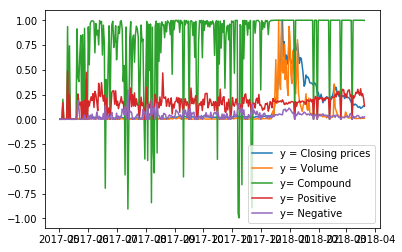

In [42]:
plt.plot(merged_data['Date'],merged_data['Close_scaled'])
plt.plot(merged_data['Date'],merged_data['Volume_scaled'])
plt.plot(merged_data['Date'],merged_data['Compound'])
plt.plot(merged_data['Date'],merged_data['Positive'])
plt.plot(merged_data['Date'],merged_data['Negative'])
plt.legend(['y = Closing prices','y = Volume','y= Compound','y= Positive','y= Negative'],loc='lower right')
plt.show()

In [43]:
df_tweets_values = pd.DataFrame(df_tweets_test['time'].value_counts())

In [44]:
df_tweets_values.sort_index(inplace=True)

In [45]:
df_tweets_values.reset_index(inplace=True)
df_tweets_values.columns=['Date','count']

In [46]:
df_tweets_values.head()

,Date,count
0,2017-05-05,1
1,2017-05-06,1
2,2017-05-10,4
3,2017-05-12,2
4,2017-05-14,1


In [47]:
merged_data.head()

,Date,Open,High,Low,Close,Volume,Market Cap,Volume_scaled,Close_scaled,Tweets,Compound,Negative,Neutral,Positive
0,2017-05-02,0.000072,0.000088,0.000059,0.000075,12046.0,"959,990",0.000002,0.000000,0,0.0000,0.0,0.000,0.000
1,2017-05-03,0.000087,0.000090,0.000061,0.000075,13225.0,"1,171,800",0.000003,0.000000,0,0.0000,0.0,0.000,0.000
2,2017-05-04,0.000075,0.000090,0.000060,0.000077,27851.0,"1,010,160",0.000018,0.000008,0,0.0000,0.0,0.000,0.000
3,2017-05-05,0.000077,0.000094,0.000062,0.000078,29354.0,"1,029,780",0.000019,0.000012,one of the last chances to get this cheap at 6,0.2023,0.0,0.833,0.167
4,2017-05-06,0.000078,0.000094,0.000077,0.000080,10393.0,"1,043,520",0.000000,0.000020,,0.0000,0.0,0.000,0.000


In [48]:
merged_data=merged_data.merge(df_tweets_values,on='Date')

In [49]:
merged_data.head()

,Date,Open,High,Low,Close,Volume,Market Cap,Volume_scaled,Close_scaled,Tweets,Compound,Negative,Neutral,Positive,count
0,2017-05-05,0.000077,0.000094,0.000062,0.000078,29354.0,"1,029,780",0.000019,0.000012,one of the last chances to get this cheap at 6,0.2023,0.0,0.833,0.167,1
1,2017-05-06,0.000078,0.000094,0.000077,0.000080,10393.0,"1,043,520",0.000000,0.000020,,0.0000,0.0,0.000,0.000,1
2,2017-05-10,0.000088,0.000124,0.000071,0.000123,56012.0,"1,179,190",0.000046,0.000188,"just bought more with very pretty cool price, ...",0.9356,0.0,0.512,0.488,4
3,2017-05-12,0.000146,0.000198,0.000135,0.000136,91463.0,"1,963,620",0.000083,0.000239,"gain 60% within 2 days, very cool, the near ta...",0.7419,0.0,0.751,0.249,2
4,2017-05-14,0.000125,0.000163,0.000125,0.000161,17914.0,"1,673,540",0.000008,0.000337,lereseau lacit pic.twitter.com/hpea8lxzdg,0.0000,0.0,1.000,0.000,1


In [50]:
merged_data['Tweets'].replace([0],'',inplace=True)

In [51]:
merged_data['Negative_m']=merged_data.apply(lambda row: row['Negative']*int(row['count']),axis=1)
merged_data['Neutral_m']=merged_data.apply(lambda row: row['Neutral']*int(row['count']),axis=1)
merged_data['Positive_m']=merged_data.apply(lambda row: row['Positive']*int(row['count']),axis=1)
merged_data['Compound']=merged_data.apply(lambda row: row['Compound']*int(row['count']),axis=1)

In [52]:
merged_data

,Date,Open,High,Low,Close,Volume,Market Cap,Volume_scaled,Close_scaled,Tweets,Compound,Negative,Neutral,Positive,count,Negative_m,Neutral_m,Positive_m
0,2017-05-05,0.000077,0.000094,0.000062,0.000078,29354.0,"1,029,780",0.000019,0.000012,one of the last chances to get this cheap at 6,0.2023,0.000,0.833,0.167,1,0.000,0.833,0.167
1,2017-05-06,0.000078,0.000094,0.000077,0.000080,10393.0,"1,043,520",0.000000,0.000020,,0.0000,0.000,0.000,0.000,1,0.000,0.000,0.000
2,2017-05-10,0.000088,0.000124,0.000071,0.000123,56012.0,"1,179,190",0.000046,0.000188,"just bought more with very pretty cool price, ...",3.7424,0.000,0.512,0.488,4,0.000,2.048,1.952
3,2017-05-12,0.000146,0.000198,0.000135,0.000136,91463.0,"1,963,620",0.000083,0.000239,"gain 60% within 2 days, very cool, the near ta...",1.4838,0.000,0.751,0.249,2,0.000,1.502,0.498
4,2017-05-14,0.000125,0.000163,0.000125,0.000161,17914.0,"1,673,540",0.000008,0.000337,lereseau lacit pic.twitter.com/hpea8lxzdg,0.0000,0.000,1.000,0.000,1,0.000,1.000,0.000
5,2017-05-17,0.000139,0.000170,0.000120,0.000163,68910.0,"1,865,150",0.000060,0.000345,"if can keep at 9 sat today for daily charts, i...",0.0000,0.000,1.000,0.000,1,0.000,1.000,0.000
6,2017-05-18,0.000163,0.000302,0.000145,0.000245,545512.0,"2,181,100",0.000545,0.000666,pump coming,0.0000,0.000,1.000,0.000,1,0.000,1.000,0.000
7,2017-05-20,0.000392,0.000418,0.000336,0.000368,491970.0,"5,257,290",0.000491,0.001147,"$dgb on track, hitting 400 satoshi, 600 sats i...",9.1270,0.000,0.942,0.058,10,0.000,9.420,0.580
8,2017-05-21,0.000368,0.000974,0.000326,0.000974,2587680.0,"4,936,910",0.002625,0.003520,"yes, yes, dump so i can sit back and scoop it ...",0.8398,0.188,0.556,0.256,2,0.376,1.112,0.512
9,2017-05-22,0.000957,0.001470,0.000734,0.000907,5242510.0,"12,837,800",0.005330,0.003258,btc-xvg $xvg i think your predictions are shi...,1.5208,0.120,0.706,0.174,4,0.480,2.824,0.696


In [53]:
x = merged_data[['Negative_m']]
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
merged_data=pd.concat([merged_data,pd.DataFrame(x_scaled,columns=['Negative_scaled'])],axis=1)
x = merged_data[['Neutral_m']]
x_scaled = min_max_scaler.fit_transform(x)
merged_data=pd.concat([merged_data,pd.DataFrame(x_scaled,columns=['Netral_scaled'])],axis=1)
x = merged_data[['Positive_m']]
x_scaled = min_max_scaler.fit_transform(x)
merged_data=pd.concat([merged_data,pd.DataFrame(x_scaled,columns=['Positive_scaled'])],axis=1)
x = merged_data[['Compound']]
x_scaled = min_max_scaler.fit_transform(x)
merged_data=pd.concat([merged_data,pd.DataFrame(x_scaled,columns=['Compound_scaled'])],axis=1)

In [54]:
merged_data

,Date,Open,High,Low,Close,Volume,Market Cap,Volume_scaled,Close_scaled,Tweets,...,Neutral,Positive,count,Negative_m,Neutral_m,Positive_m,Negative_scaled,Netral_scaled,Positive_scaled,Compound_scaled
0,2017-05-05,0.000077,0.000094,0.000062,0.000078,29354.0,"1,029,780",0.000019,0.000012,one of the last chances to get this cheap at 6,...,0.833,0.167,1,0.000,0.833,0.167,0.000000,0.000244,0.000220,0.014988
1,2017-05-06,0.000078,0.000094,0.000077,0.000080,10393.0,"1,043,520",0.000000,0.000020,,...,0.000,0.000,1,0.000,0.000,0.000,0.000000,0.000000,0.000000,0.014945
2,2017-05-10,0.000088,0.000124,0.000071,0.000123,56012.0,"1,179,190",0.000046,0.000188,"just bought more with very pretty cool price, ...",...,0.512,0.488,4,0.000,2.048,1.952,0.000000,0.000599,0.002569,0.015736
3,2017-05-12,0.000146,0.000198,0.000135,0.000136,91463.0,"1,963,620",0.000083,0.000239,"gain 60% within 2 days, very cool, the near ta...",...,0.751,0.249,2,0.000,1.502,0.498,0.000000,0.000440,0.000655,0.015259
4,2017-05-14,0.000125,0.000163,0.000125,0.000161,17914.0,"1,673,540",0.000008,0.000337,lereseau lacit pic.twitter.com/hpea8lxzdg,...,1.000,0.000,1,0.000,1.000,0.000,0.000000,0.000293,0.000000,0.014945
5,2017-05-17,0.000139,0.000170,0.000120,0.000163,68910.0,"1,865,150",0.000060,0.000345,"if can keep at 9 sat today for daily charts, i...",...,1.000,0.000,1,0.000,1.000,0.000,0.000000,0.000293,0.000000,0.014945
6,2017-05-18,0.000163,0.000302,0.000145,0.000245,545512.0,"2,181,100",0.000545,0.000666,pump coming,...,1.000,0.000,1,0.000,1.000,0.000,0.000000,0.000293,0.000000,0.014945
7,2017-05-20,0.000392,0.000418,0.000336,0.000368,491970.0,"5,257,290",0.000491,0.001147,"$dgb on track, hitting 400 satoshi, 600 sats i...",...,0.942,0.058,10,0.000,9.420,0.580,0.000000,0.002757,0.000763,0.016874
8,2017-05-21,0.000368,0.000974,0.000326,0.000974,2587680.0,"4,936,910",0.002625,0.003520,"yes, yes, dump so i can sit back and scoop it ...",...,0.556,0.256,2,0.376,1.112,0.512,0.000776,0.000325,0.000674,0.015123
9,2017-05-22,0.000957,0.001470,0.000734,0.000907,5242510.0,"12,837,800",0.005330,0.003258,btc-xvg $xvg i think your predictions are shi...,...,0.706,0.174,4,0.480,2.824,0.696,0.000990,0.000827,0.000916,0.015267


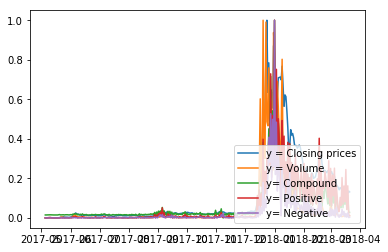

In [55]:
plt.plot(merged_data['Date'],merged_data['Close_scaled'])
plt.plot(merged_data['Date'],merged_data['Volume_scaled'])
plt.plot(merged_data['Date'],merged_data['Compound_scaled'])
plt.plot(merged_data['Date'],merged_data['Positive_scaled'])
plt.plot(merged_data['Date'],merged_data['Negative_scaled'])
plt.legend(['y = Closing prices','y = Volume','y= Compound','y= Positive','y= Negative'],loc='lower right')
plt.show()

In [56]:
merged_data = merged_data[merged_data['Date']>dt.datetime(2017,12,1)]

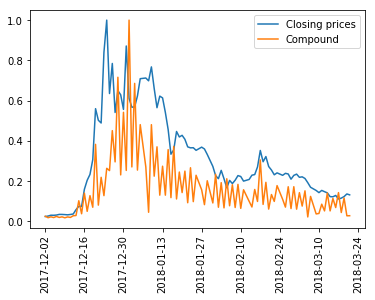

In [100]:
plt.plot(merged_data['Date'],merged_data['Close_scaled'])
# plt.plot(merged_data['Date'],merged_data['Volume_scaled'])
plt.plot(merged_data['Date'],merged_data['Compound_scaled'])
# plt.plot(merged_data['Date'],merged_data['Positive_scaled'])
# plt.plot(merged_data['Date'],merged_data['Negative_scaled'])
plt.legend(['Closing prices','Compound'],loc='upper right')#,'Positive','Negative'
plt.xticks(rotation=90)
plt.show()

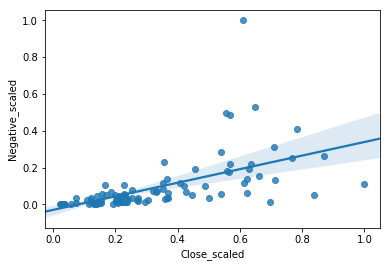

In [81]:
fig, ax = plt.subplots()

sns.regplot(x='Close_scaled',y='Negative_scaled',data=merged_data)

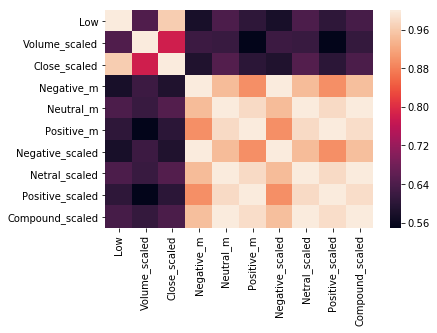

In [59]:
import seaborn as sns
merged_data_test = merged_data.drop(['Open','High','Close','Volume','Neutral','Positive','Compound','Negative','count'],axis=1)
corr=merged_data_test.corr()
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

In [63]:
merged_data.reset_index(drop=True, inplace=True)

In [64]:
merged_data.isnull().any()

Date               False
Open               False
High               False
Low                False
Close              False
Volume             False
Market Cap         False
Volume_scaled      False
Close_scaled       False
Tweets             False
Compound           False
Negative           False
Neutral            False
Positive           False
count              False
Negative_m         False
Neutral_m          False
Positive_m         False
Negative_scaled    False
Netral_scaled      False
Positive_scaled    False
Compound_scaled    False
dtype: bool

In [65]:
from pandas.plotting import lag_plot

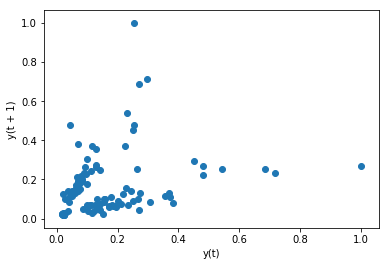

In [68]:
lag_plot(merged_data['Compound_scaled'])

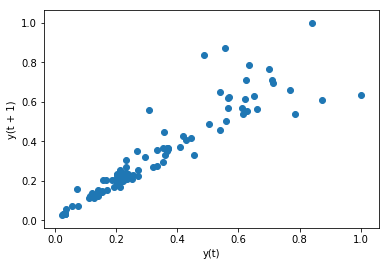

In [69]:
lag_plot(merged_data['Close_scaled'])

In [90]:
merged_data['Pct Change'] = merged_data['Close'].pct_change()

C:\Users\Akshay\AppData\Local\conda\conda\envs\machinelearning\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [106]:
merged_data.dropna(how='any',inplace=True)
x=merged_data[['Pct Change']]
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
merged_data=pd.concat([merged_data,pd.DataFrame(x_scaled,columns=['Pct_scaled'])],axis=1)


C:\Users\Akshay\AppData\Local\conda\conda\envs\machinelearning\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [107]:
merged_data

,Date,Open,High,Low,Close,Volume,Market Cap,Volume_scaled,Close_scaled,Tweets,...,count,Negative_m,Neutral_m,Positive_m,Negative_scaled,Netral_scaled,Positive_scaled,Compound_scaled,Pct Change,Pct_scaled
0,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.302000
1,2017-12-03,0.006136,0.007735,0.005979,0.006723,5592120.0,"87,978,200",0.005686,0.026033,there is a lot of potential in verge... it has...,...,15.0,0.315,13.335,1.350,0.000650,0.003903,0.001777,0.017828,0.094951,0.345153
2,2017-12-04,0.006855,0.008185,0.006656,0.007803,7735120.0,"98,308,300",0.007869,0.030262,sigue por encima de la barrera de los 10000$ p...,...,36.0,2.052,29.952,3.996,0.004233,0.008767,0.005260,0.022370,0.160643,0.233732
3,2017-12-05,0.007919,0.008584,0.007314,0.007733,6136980.0,"113,601,000",0.006241,0.029988,yoooo close to 9k thank you for your steady su...,...,19.0,1.159,15.903,1.938,0.002391,0.004655,0.002551,0.018670,-0.008971,0.262222
4,2017-12-06,0.007618,0.008063,0.007106,0.007999,6034820.0,"109,316,000",0.006137,0.031030,rt special offer join our pre-ico sale!! new ...,...,44.0,1.672,35.376,6.952,0.003449,0.010354,0.009150,0.024222,0.034398,0.307706
5,2017-12-07,0.007868,0.008847,0.007628,0.008828,7877410.0,"112,922,000",0.008014,0.034276,xvg pic.twitter.com/2xs8fmts79 i bought zer0...,...,21.0,0.315,17.493,3.192,0.000650,0.005120,0.004201,0.019323,0.103638,0.237021
6,2017-12-08,0.008677,0.009150,0.007607,0.008793,5311020.0,"124,572,000",0.005400,0.034139,that's going to be huge then free 150 viu hu...,...,34.0,0.510,27.880,5.610,0.001052,0.008160,0.007384,0.022103,-0.003965,0.224310
7,2017-12-09,0.008916,0.009633,0.008002,0.008588,3849740.0,"128,031,000",0.003911,0.033336,never lets me down one of my favorites $xvg t...,...,14.0,0.532,12.320,1.148,0.001097,0.003606,0.001511,0.017474,-0.023314,0.217137
8,2017-12-10,0.008712,0.008712,0.007423,0.008294,3091980.0,"125,143,000",0.003139,0.032185,has a 2100x profit potential verge never dis...,...,33.0,0.429,28.710,3.861,0.000885,0.008403,0.005082,0.021809,-0.034234,0.277009
9,2017-12-11,0.008212,0.009273,0.008168,0.008766,4143160.0,"117,988,000",0.004210,0.034034,$etp $neo $xvg $bch $btc $ltc $gno $iota $rpx ...,...,21.0,0.588,16.653,3.759,0.001213,0.004874,0.004948,0.019339,0.056909,0.281890
